In [14]:
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as py
from scipy import stats
!pip install pmdarima
from pmdarima.utils import tsdisplay
from pmdarima.arima import auto_arima
!pip3 install arch
import arch.data.default
from arch.unitroot import ADF
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from datetime import date


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##Ativo 01

In [15]:
#ticket_01 = '^NDX'
#ticket_01 = '^VIX'
#ticket_01 = 'DOGE-USD'
ticket_01 = 'BTC-USD'
ticket_02 = '^NDX'
data_inicio = '2023-10-30'
data_fim    = pd.to_datetime("today").strftime('%Y-%m-%d')
dados_01 = yf.download(ticket_01, start=data_inicio, end=data_fim)
dados_02 = yf.download(ticket_02, start=data_inicio, end=data_fim )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
dados_01['Return'] = np.log(dados_01['Adj Close'] / dados_01['Adj Close'].shift(1))
dados_01 = dados_01.dropna()
#tsdisplay(dados_01['Adj Close'])
#tsdisplay(dados_01['Return'])
dados_01.tail()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2023-11-28,37247.992188,38368.480469,36891.089844,37831.085938,37831.085938,21696137014,0.015367
2023-11-29,37826.105469,38366.113281,37612.632812,37858.492188,37858.492188,20728546658,0.000724
2023-11-30,37861.117188,38141.753906,37531.140625,37712.746094,37712.746094,18115982627,-0.003857
2023-12-01,37718.007812,38954.109375,37629.359375,38688.750000,38688.750000,23512784002,0.025551
2023-12-02,38689.277344,39678.937500,38652.593750,39476.332031,39476.332031,15534035612,0.020152


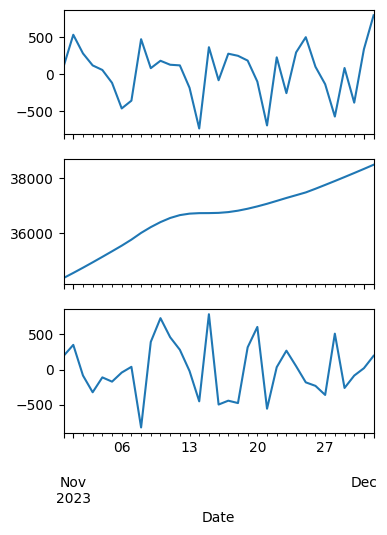

In [17]:
# Decmposição STL
dados_01 = dados_01.asfreq('D')
dados_01['Adj Close'] = dados_01['Adj Close'].interpolate()
stl_dados_01 = sm.tsa.STL(dados_01['Adj Close'])
stl_dados_01_res = stl_dados_01.fit()
fig, axes = py.subplots(nrows=3, sharex=True, figsize=(4, 5.5))
stl_dados_01_res.seasonal.plot(ax=axes[0])
stl_dados_01_res.trend.plot(ax=axes[1])
stl_dados_01_res.resid.plot(ax=axes[2])
#plot_seasonal_decomp(stl_dados_01_res.trend, stl_dados_01_res.seasonal, stl_dados_01_res.resid, "STL")
dados_01_ns = stl_dados_01_res.trend+stl_dados_01_res.resid

In [18]:
# Teste de Dickey-Fuller aumentado com drift+trend
adf_dados_01_trend = adfuller(dados_01['Adj Close'], regression='ct')
adf_dados_01_trend
print(f'ADF Statistic: {adf_dados_01_trend[0]}')
print(f'p-value: {adf_dados_01_trend[1]}')
for key, value in adf_dados_01_trend[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.366147975338738
p-value: 0.0024782350532611885
Critial Values:
   1%, -4.27353517944336
Critial Values:
   5%, -3.5578989233398435
Critial Values:
   10%, -3.2123659912109375


In [19]:
# Vamos tomar a primeira diferença da série a analisar o resultado
dif_dados_01 = dados_01['Adj Close'].diff().dropna()
#tsdisplay(dif_dados_01)

In [20]:
# Teste de Dickey-Fuller aumentado com drift+trend
adf_dif_dados_01_trend = adfuller(dif_dados_01, regression='ct')
adf_dif_dados_01_trend
print(f'ADF Statistic: {adf_dif_dados_01_trend[0]}')
print(f'p-value: {adf_dif_dados_01_trend[1]}')
for key, value in adf_dif_dados_01_trend[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.323639865518528
p-value: 5.0899320809483154e-05
Critial Values:
   1%, -4.2970953703703705
Critial Values:
   5%, -3.5685571851851847
Critial Values:
   10%, -3.2184266666666668


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=501.428, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=503.202, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=504.412, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=506.466, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=503.229, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=504.151, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=505.226, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=508.363, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=504.510, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=505.299, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=503.274, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=506.215, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=508.518, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec

Best model:  ARIMA(0,1,0)(0,0,0)

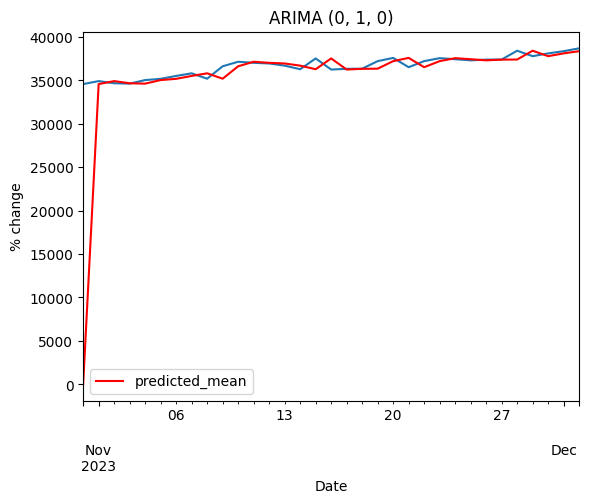

In [21]:
#Auto Arima
AUTO_ARIMA = auto_arima(dados_01_ns,
                       start_p=1, start_q=1,
                       max_p=3, max_q=3,
                       seasonal=False,
                       d=1,
                       trace=True,
                       error_action='trace',
                       suppress_warnings=True,
                       stepwise=False)

print(AUTO_ARIMA.params())

best_model = AUTO_ARIMA
best_order = best_model.order

# Melhor modelo ARIMA(best_order)
BEST_ARIMA_adf_dados_01_ns = ARIMA(dados_01_ns, order=(best_order))
res_BEST_ARIMA_adf_dados_01_ns = BEST_ARIMA_adf_dados_01_ns.fit()
print(res_BEST_ARIMA_adf_dados_01_ns.summary())
BEST_ARIMA_adf_dados_01_ns_predict = pd.DataFrame(res_BEST_ARIMA_adf_dados_01_ns.predict())
fig, ax = py.subplots(1, 1)
dados_01_ns.plot(ax=ax)
BEST_ARIMA_adf_dados_01_ns_predict.plot(ax=ax,color='red')
py.ylabel("% change"); py.title('ARIMA '+str(best_order));
py.show()

     lb_stat  lb_pvalue
10  0.088804        1.0


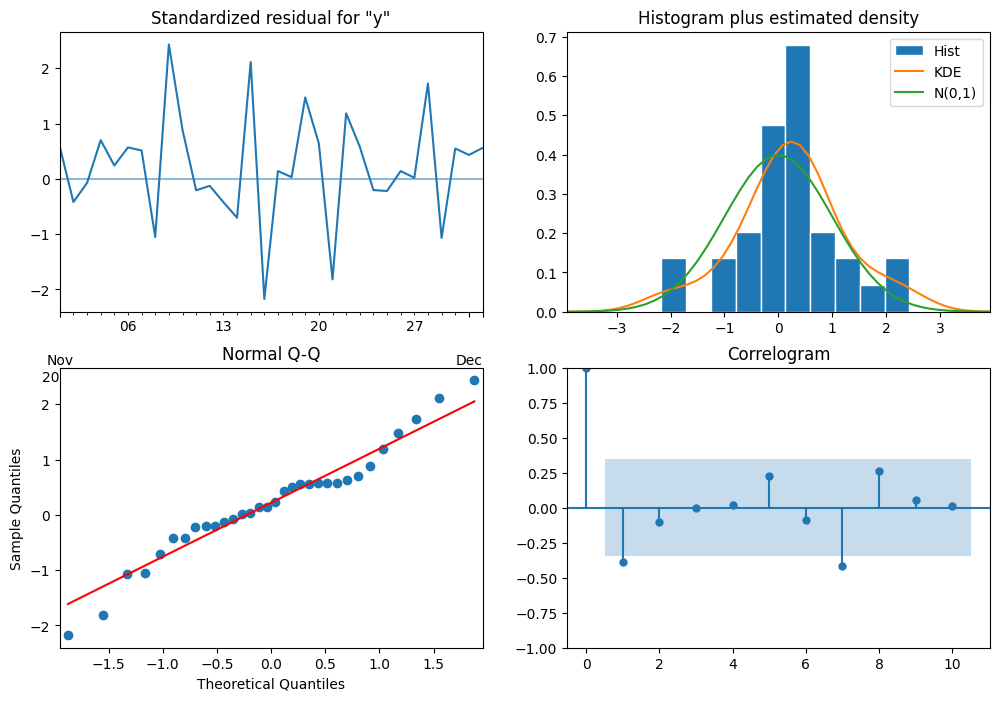

In [22]:
# Analise dos resíduos
AUX = acorr_ljungbox(res_BEST_ARIMA_adf_dados_01_ns.resid, lags=[10])
res_BEST_ARIMA_adf_dados_01_ns.plot_diagnostics(figsize=(12,8))
print(AUX)
py.show()

In [28]:
indice_10_frente_temp = pd.date_range(dados_01_ns.index[-1], freq="D", periods = 10+1) #Índice temporal para as previsões
indice_10_frente = indice_10_frente_temp[1:]
fcast_BEST_ARIMA_dados_01 = res_BEST_ARIMA_adf_dados_01_ns.get_forecast(10)
fcast_BEST_ARIMA_dados_01_mean = fcast_BEST_ARIMA_dados_01.summary_frame(alpha=0.05)['mean']
fcast_BEST_ARIMA_dados_01_low = fcast_BEST_ARIMA_dados_01.summary_frame(alpha=0.05)['mean_ci_lower']
fcast_BEST_ARIMA_dados_01_up = fcast_BEST_ARIMA_dados_01.summary_frame(alpha=0.05)['mean_ci_upper']
fcast_BEST_ARIMA_dados_01_mean = fcast_BEST_ARIMA_dados_01_mean.rename('ARIMA Forecast ' + str(best_order))

Forecast ARMA  (0, 1, 0) :
 y                   mean      mean_se  mean_ci_lower  mean_ci_upper
2023-12-03  38683.367832   588.357706   37530.207918   39836.527746
2023-12-04  38683.367832   832.063447   37052.553443   40314.182222
2023-12-05  38683.367832  1019.065440   36686.036272   40680.699392
2023-12-06  38683.367832  1176.715412   36377.048005   40989.687660
2023-12-07  38683.367832  1315.607826   36104.823876   41261.911788
2023-12-08  38683.367832  1441.176166   35858.714452   41508.021213
2023-12-09  38683.367832  1556.648172   35632.393478   41734.342186
2023-12-10  38683.367832  1664.126895   35421.739053   41944.996612
2023-12-11  38683.367832  1765.073118   35223.888091   42142.847574
2023-12-12  38683.367832  1860.550430   35036.755998   42329.979666 



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

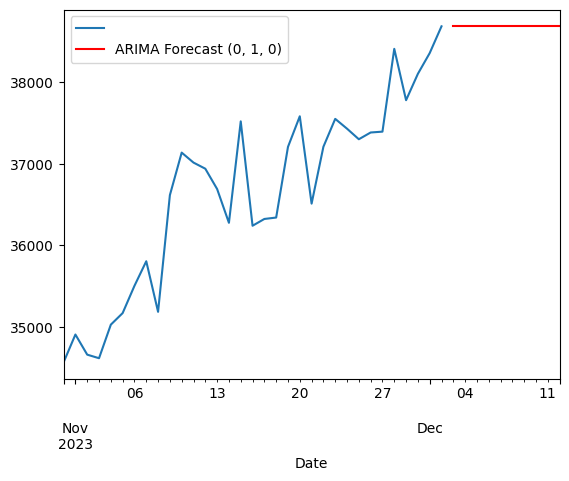

In [30]:
## Imprime as previsões
print(f'Forecast ARMA ',best_order, ':\n',fcast_BEST_ARIMA_dados_01.summary_frame(alpha=0.05),'\n')

## Gráfico das previsões
fig_, ax_ = py.subplots(1, 1)
dados_01_ns.plot(ax=ax_, legend=True)
fcast_BEST_ARIMA_dados_01_mean.plot(ax=ax_,color='red', legend=True)
ax_.fill_between(indice_10_frente, fcast_BEST_ARIMA_dados_01_low, fcast_BEST_ARIMA_dados_01_up, color='k',alpha=.09);
py.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -68.4647
Distribution:                  Normal   AIC:                           144.929
Method:            Maximum Likelihood   BIC:                           150.915
                                        No. Observations:                   33
Date:                Sun, Dec 03 2023   Df Residuals:                       32
Time:                        13:58:41   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.5062      0.525      0.965      0.335 [ -0.522,  1.53

Date
2023-11-29 00:00:00                                             0.000724
2023-11-30 00:00:00                                            -0.003857
2023-12-01 00:00:00                                             0.025551
2023-12-02 00:00:00                                             0.020152
VolGARCH(1,1)          Date
2023-10-31    0.020240
2023-11-01    0.01...
Name: Return, dtype: object

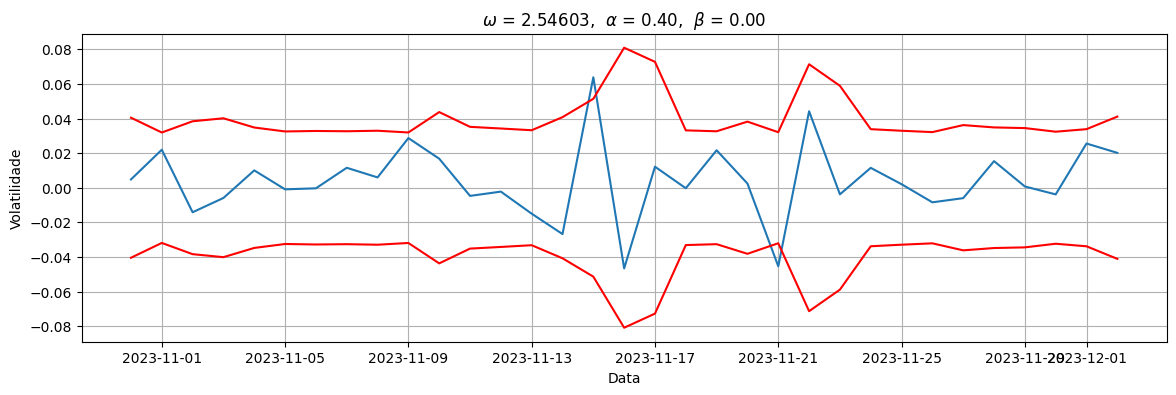

In [31]:
#GARCH (1,1)
from arch import arch_model

dados = dados_01['Return'].dropna()

garch_1_1 = arch_model(100*dados, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
garch_1_1_results = garch_1_1.fit(update_freq=0, disp=False)


print(garch_1_1_results.summary())
alpha = garch_1_1_results.params['alpha[1]']
beta  = garch_1_1_results.params['beta[1]']
omega = garch_1_1_results.params['omega']
py.figure(figsize=(14, 4))
py.plot(dados, label='Retorno')
py.plot( 2*garch_1_1_results.conditional_volatility/100, 'r', label='$\pm 2\sigma$')
py.plot(-2*garch_1_1_results.conditional_volatility/100, 'r')

py.title('$\omega$ = {:.5f},  $\\alpha$ = {:.2f},  $\\beta$ = {:.2f}'.format(omega, alpha, beta))
py.grid(True)
py.xlabel('Data')
py.ylabel('Volatilidade')
dados['VolGARCH(1,1)'] = garch_1_1_results.conditional_volatility/100
print(dados['VolGARCH(1,1)'])
dados.tail()

In [32]:
dados.tail(100)

Date
2023-10-31 00:00:00                                             0.004783
2023-11-01 00:00:00                                             0.021953
2023-11-02 00:00:00                                            -0.014182
2023-11-03 00:00:00                                            -0.005911
2023-11-04 00:00:00                                             0.010023
2023-11-05 00:00:00                                            -0.000937
2023-11-06 00:00:00                                            -0.000342
2023-11-07 00:00:00                                             0.011526
2023-11-08 00:00:00                                             0.005956
2023-11-09 00:00:00                                             0.028692
2023-11-10 00:00:00                                             0.016778
2023-11-11 00:00:00                                            -0.004726
2023-11-12 00:00:00                                            -0.002252
2023-11-13 00:00:00                           

<bound method NDFrame.head of                  0
time              
2023-12-03  0.0206
2023-12-04  0.0206
2023-12-05  0.0206
2023-12-06  0.0206
2023-12-07  0.0206
...            ...
2024-06-15  0.0206
2024-06-16  0.0206
2024-06-17  0.0206
2024-06-18  0.0206
2024-06-19  0.0206

[200 rows x 1 columns]>


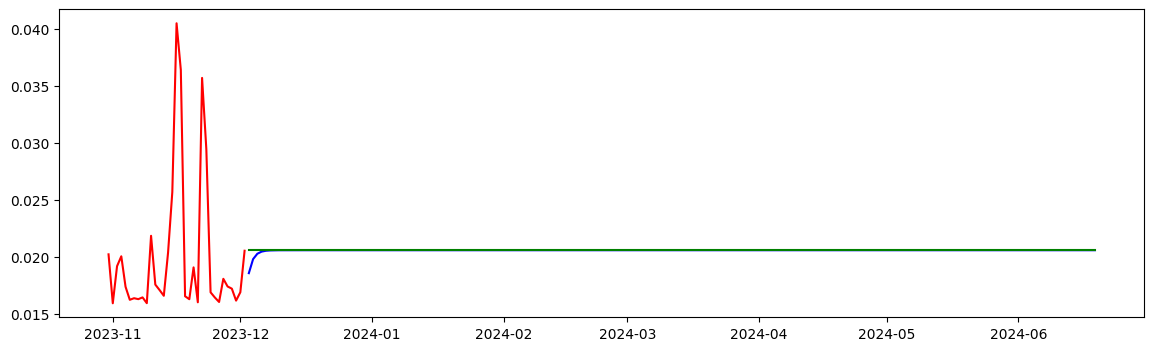

In [33]:
#GARCH(1,1)

vol_garch_1_1 = garch_1_1_results.conditional_volatility/100
forecast_garch_1_1 = garch_1_1_results.forecast(horizon=200, reindex=False)
garch_1_1_vol_forecast_np = np.sqrt(forecast_garch_1_1.variance.values)/100
garch_1_1_vol_forecast = pd.DataFrame(np.transpose(garch_1_1_vol_forecast_np))
py.figure(figsize=(14, 4))
py.plot( vol_garch_1_1, 'r')
idx_200_frente_temp = pd.date_range(vol_garch_1_1.index[-1], freq="D", periods = 200+1) #Índice temporal para as previsões
idx_200_frente = idx_200_frente_temp[1:]
garch_1_1_vol_forecast['time'] = idx_200_frente
garch_1_1_vol_forecast = garch_1_1_vol_forecast.set_index('time') #Cría índice temporal
py.plot(garch_1_1_vol_forecast, 'b')
alpha = garch_1_1_results.params['alpha[1]']
beta  = garch_1_1_results.params['beta[1]']
omega = garch_1_1_results.params['omega']
var_garch_1_1= omega/(1-(alpha + beta))
std_garch_1_1 = pd.DataFrame(np.repeat(np.sqrt(var_garch_1_1)/100,200))
std_garch_1_1['time'] = idx_200_frente
std_garch_1_1 = std_garch_1_1.set_index('time') #Cría índice temporal
py.plot(std_garch_1_1, 'g')
print(std_garch_1_1.head)

In [34]:
#######################################################################################################################################################################################################################################################

In [35]:
#######################################################################################################################################################################################################################################################

##Ativo 02

In [36]:
dados_02['Return'] = np.log(dados_02['Adj Close'] / dados_02['Adj Close'].shift(1))
dados_02 = dados_02.dropna()
#tsdisplay(dados_02['Adj Close'])
#tsdisplay(dados_02['Return'])
dados_02.tail()


,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2023-11-27,15969.719727,16045.299805,15932.190430,15961.980469,15961.980469,4205880000,-0.001254
2023-11-28,15940.290039,16031.519531,15921.070312,16010.429688,16010.429688,4474400000,0.003031
2023-11-29,16111.360352,16166.509766,15976.690430,15987.599609,15987.599609,4890220000,-0.001427
2023-11-30,15987.660156,16013.480469,15825.669922,15947.870117,15947.870117,5678070000,-0.002488
2023-12-01,15892.589844,16013.750000,15834.929688,15997.580078,15997.580078,5607000000,0.003112


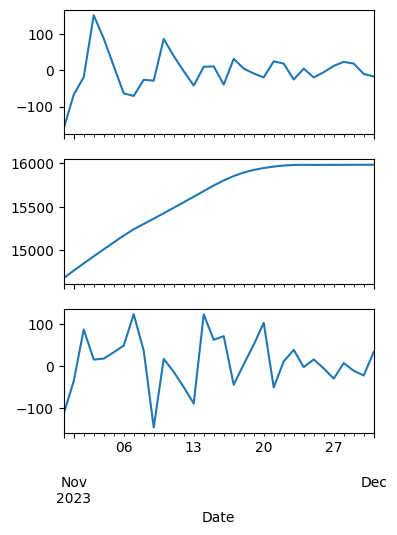

In [37]:
# Decmposição STL
dados_02 = dados_02.asfreq('D')
dados_02['Adj Close'] = dados_02['Adj Close'].interpolate()
stl_dados_02 = sm.tsa.STL(dados_02['Adj Close'])
stl_dados_02_res = stl_dados_02.fit()
fig, axes = py.subplots(nrows=3, sharex=True, figsize=(4, 5.5))
stl_dados_02_res.seasonal.plot(ax=axes[0])
stl_dados_02_res.trend.plot(ax=axes[1])
stl_dados_02_res.resid.plot(ax=axes[2])
#plot_seasonal_decomp(stl_dados_02_res.trend, stl_dados_02_res.seasonal, stl_dados_02_res.resid, "STL")
dados_02_ns = stl_dados_02_res.trend+stl_dados_02_res.resid

In [38]:
# Teste de Dickey-Fuller aumentado com drift+trend
adf_dados_02_trend = adfuller(dados_02['Adj Close'], regression='ct')
adf_dados_02_trend
print(f'ADF Statistic: {adf_dados_02_trend[0]}')
print(f'p-value: {adf_dados_02_trend[1]}')
for key, value in adf_dados_02_trend[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.5022350542964797
p-value: 0.9833459166814142
Critial Values:
   1%, -4.395041166087963
Critial Values:
   5%, -3.6123930960648147
Critial Values:
   10%, -3.243216493055556


In [39]:
# Vamos tomar a primeira diferença da série a analisar o resultado
dif_dados_02 = dados_02['Adj Close'].diff().dropna()
#tsdisplay(dif_dados_02)

In [40]:
# Teste de Dickey-Fuller aumentado com drift+trend
adf_dif_dados_02_trend = adfuller(dif_dados_02, regression='ct')
adf_dif_dados_02_trend
print(f'ADF Statistic: {adf_dif_dados_02_trend[0]}')
print(f'p-value: {adf_dif_dados_02_trend[1]}')
for key, value in adf_dif_dados_02_trend[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.561101685690814
p-value: 0.29811605788361717
Critial Values:
   1%, -4.468818601662887
Critial Values:
   5%, -3.6449459334845047
Critial Values:
   10%, -3.261490621963071


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=371.608, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=373.559, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=375.556, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=377.343, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=373.558, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=373.926, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=376.958, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=375.626, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=375.557, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=377.557, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=379.727, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=377.539, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=377.439, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)

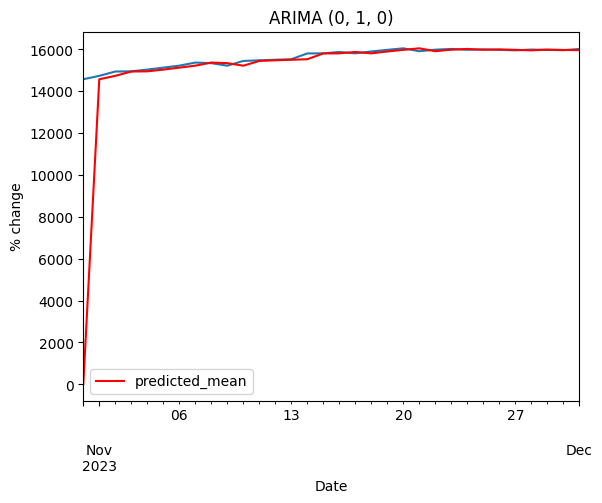

In [41]:
#Auto Arima
AUTO_ARIMA_02 = auto_arima(dados_02_ns,
                       start_p=1, start_q=1,
                       max_p=3, max_q=3,
                       seasonal=False,
                       d=1,
                       trace=True,
                       error_action='trace',
                       suppress_warnings=True,
                       stepwise=False)

print(AUTO_ARIMA_02.params())

best_model_02 = AUTO_ARIMA_02
best_order_02 = best_model_02.order

# Melhor modelo ARIMA(best_order_02)
BEST_ARIMA_adf_dados_02_ns = ARIMA(dados_02_ns, order=(best_order_02))
res_BEST_ARIMA_adf_dados_02_ns = BEST_ARIMA_adf_dados_02_ns.fit()
print(res_BEST_ARIMA_adf_dados_02_ns.summary())
BEST_ARIMA_adf_dados_02_ns_predict = pd.DataFrame(res_BEST_ARIMA_adf_dados_02_ns.predict())
fig, ax = py.subplots(1, 1)
dados_02_ns.plot(ax=ax)
BEST_ARIMA_adf_dados_02_ns_predict.plot(ax=ax,color='red')
py.ylabel("% change"); py.title('ARIMA '+str(best_order_02));
py.show()

     lb_stat  lb_pvalue
10  0.034541        1.0


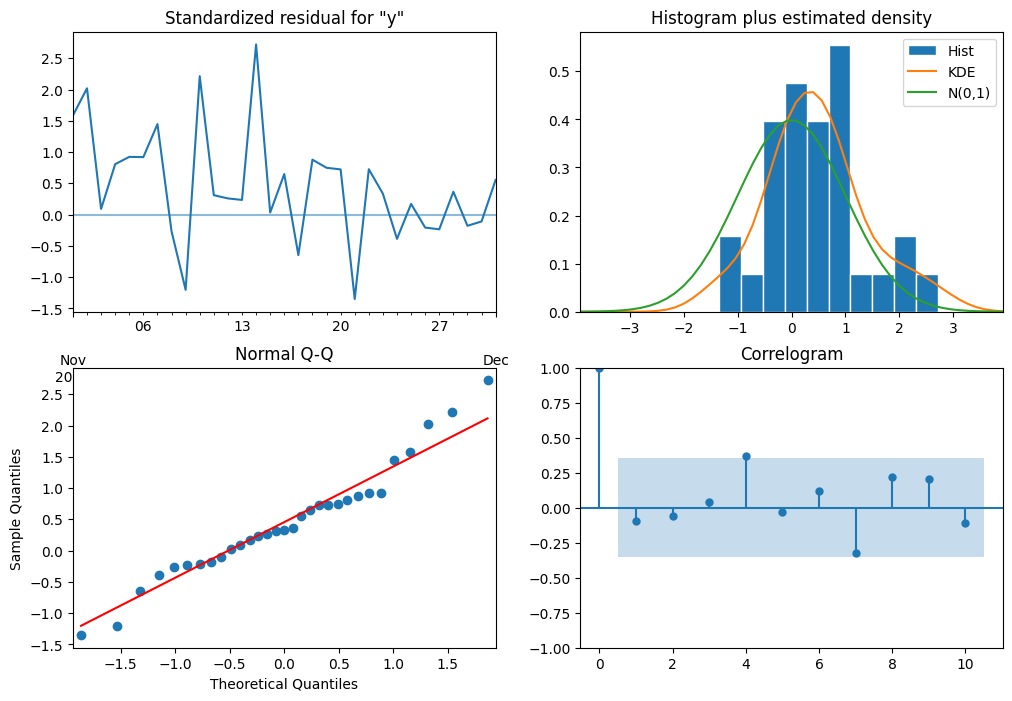

In [42]:
# Analise dos resíduos
AUX = acorr_ljungbox(res_BEST_ARIMA_adf_dados_02_ns.resid, lags=[10])
res_BEST_ARIMA_adf_dados_02_ns.plot_diagnostics(figsize=(12,8))
print(AUX)
py.show()

In [43]:
indice_10_frente_temp_02 = pd.date_range(dados_02_ns.index[-1], freq="D", periods = 10+1) #Índice temporal para as previsões
indice_10_frente_02 = indice_10_frente_temp_02[1:]
fcast_BEST_ARIMA_dados_02 = res_BEST_ARIMA_adf_dados_02_ns.get_forecast(10)
fcast_BEST_ARIMA_dados_02_mean = fcast_BEST_ARIMA_dados_02.summary_frame(alpha=0.05)['mean']
fcast_BEST_ARIMA_dados_02_low = fcast_BEST_ARIMA_dados_02.summary_frame(alpha=0.05)['mean_ci_lower']
fcast_BEST_ARIMA_dados_02_up = fcast_BEST_ARIMA_dados_02.summary_frame(alpha=0.05)['mean_ci_upper']
fcast_BEST_ARIMA_dados_02_mean = fcast_BEST_ARIMA_dados_02_mean.rename('ARIMA Forecast ' + str(best_order))

Forecast ARMA  (0, 1, 0) :
 y                   mean     mean_se  mean_ci_lower  mean_ci_upper
2023-12-02  16014.607801  102.159415   15814.379028   16214.836575
2023-12-03  16014.607801  144.475230   15731.441554   16297.774048
2023-12-04  16014.607801  176.945297   15667.801393   16361.414210
2023-12-05  16014.607801  204.318829   15614.150254   16415.065348
2023-12-06  16014.607801  228.435396   15566.882653   16462.332950
2023-12-07  16014.607801  250.238438   15524.149474   16505.066128
2023-12-08  16014.607801  270.288405   15484.852261   16544.363341
2023-12-09  16014.607801  288.950460   15448.275307   16580.940295
2023-12-10  16014.607801  306.478244   15413.921481   16615.294122
2023-12-11  16014.607801  323.056435   15381.428824   16647.786779 



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

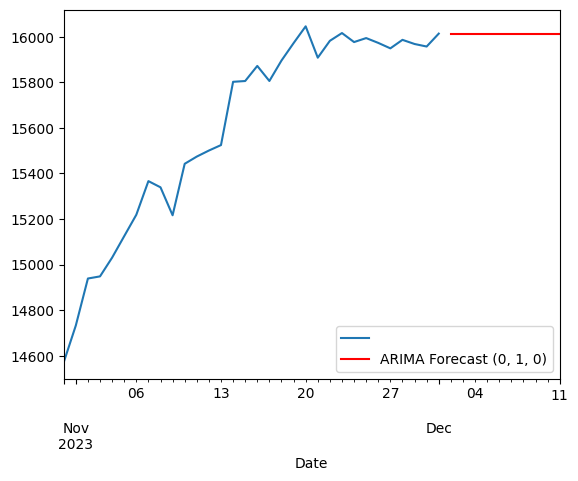

In [44]:
## Imprime as previsões
print(f'Forecast ARMA ',best_order, ':\n',fcast_BEST_ARIMA_dados_02.summary_frame(alpha=0.05),'\n')

## Gráfico das previsões
fig_, ax_ = py.subplots(1, 1)
dados_02_ns.plot(ax=ax_, legend=True)
fcast_BEST_ARIMA_dados_02_mean.plot(ax=ax_,color='red', legend=True)
ax_.fill_between(indice_10_frente, fcast_BEST_ARIMA_dados_02_low, fcast_BEST_ARIMA_dados_02_up, color='k',alpha=.09);
py.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -28.1155
Distribution:                  Normal   AIC:                           64.2309
Method:            Maximum Likelihood   BIC:                           68.7729
                                        No. Observations:                   23
Date:                Sun, Dec 03 2023   Df Residuals:                       22
Time:                        13:59:20   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.4524      0.193      2.345  1.904e-02 [7.425e-0

<bound method NDFrame.head of Date
2023-10-31    0.008513
2023-11-01    0.007358
2023-11-02    0.009425
2023-11-03    0.009693
2023-11-06    0.008430
2023-11-07    0.007343
2023-11-08    0.007441
2023-11-09    0.007293
2023-11-10    0.009327
2023-11-13    0.011318
2023-11-14    0.008842
2023-11-15    0.010834
2023-11-16    0.008200
2023-11-17    0.007469
2023-11-20    0.007395
2023-11-21    0.007916
2023-11-22    0.008745
2023-11-24    0.007408
2023-11-27    0.007611
2023-11-28    0.007659
2023-11-29    0.007193
2023-11-30    0.007607
2023-12-01    0.007889
Name: cond_vol, dtype: float64>

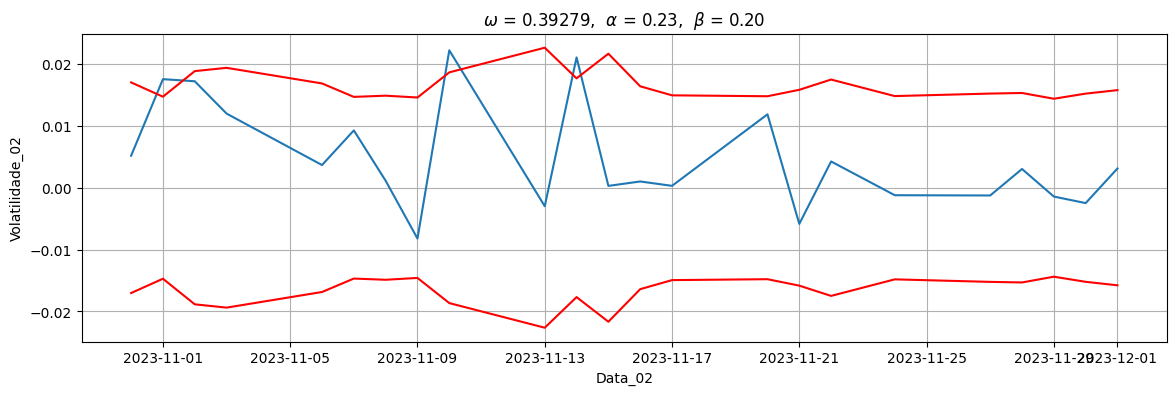

In [45]:
#GARCH (1,1)
from arch import arch_model

dados_02_2 = dados_02['Return'].dropna()
garch_1_1_02 = arch_model(100*dados_02_2, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
garch_1_1_results_02 = garch_1_1_02.fit(update_freq=0, disp=False)


print(garch_1_1_results_02.summary())
alpha_02 = garch_1_1_results_02.params['alpha[1]']
beta_02  = garch_1_1_results_02.params['beta[1]']
omega_02 = garch_1_1_results_02.params['omega']
py.figure(figsize=(14, 4))
py.plot(dados_02_2, label='Retorno')
py.plot( 2*garch_1_1_results_02.conditional_volatility/100, 'r', label='$\pm 2\sigma$')
py.plot(-2*garch_1_1_results_02.conditional_volatility/100, 'r')

py.title('$\omega$ = {:.5f},  $\\alpha$ = {:.2f},  $\\beta$ = {:.2f}'.format(omega_02, alpha_02, beta_02))
py.grid(True)
py.xlabel('Data_02')
py.ylabel('Volatilidade_02')
dados_02_2['VolGARCH(1,1)_02'] = garch_1_1_results_02.conditional_volatility/100
dados_02_2['VolGARCH(1,1)_02'].head

<bound method NDFrame.head of                    0
time                
2023-12-02  0.008091
2023-12-03  0.008091
2023-12-04  0.008091
2023-12-05  0.008091
2023-12-06  0.008091
...              ...
2024-03-06  0.008091
2024-03-07  0.008091
2024-03-08  0.008091
2024-03-09  0.008091
2024-03-10  0.008091

[100 rows x 1 columns]>


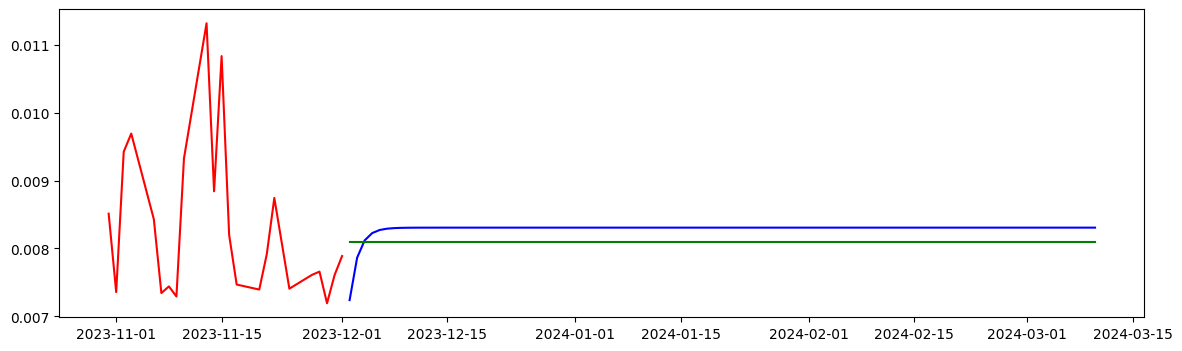

In [46]:
#GARCH(1,1)

vol_garch_1_1_02 = garch_1_1_results_02.conditional_volatility/100
forecast_garch_1_1_02 = garch_1_1_results_02.forecast(horizon=100, reindex=False)
garch_1_1_vol_forecast_np_02 = np.sqrt(forecast_garch_1_1_02.variance.values)/100
garch_1_1_vol_forecast_02 = pd.DataFrame(np.transpose(garch_1_1_vol_forecast_np_02))
py.figure(figsize=(14, 4))
py.plot( vol_garch_1_1_02, 'r')
idx_frente_temp_02 = pd.date_range(vol_garch_1_1_02.index[-1], freq="D", periods = 100+1) #Índice temporal para as previsões
idx_frente_02 = idx_frente_temp_02[1:]
garch_1_1_vol_forecast_02['time'] = idx_frente_02
garch_1_1_vol_forecast_02 = garch_1_1_vol_forecast_02.set_index('time') #Cría índice temporal
py.plot(garch_1_1_vol_forecast_02, 'b')
alpha_02 = garch_1_1_results_02.params['alpha[1]']
beta_02  = garch_1_1_results_02.params['beta[1]']
omega_02 = garch_1_1_results_02.params['omega']
var_garch_1_1_02= omega_02/(1-(alpha + beta))
std_garch_1_1_02 = pd.DataFrame(np.repeat(np.sqrt(var_garch_1_1_02)/100,100))
std_garch_1_1_02['time'] = idx_frente_02
std_garch_1_1_02 = std_garch_1_1_02.set_index('time') #Cría índice temporal
py.plot(std_garch_1_1_02, 'g')
print(std_garch_1_1_02.head)

In [47]:
#######################################################################################################################################################################################################################################################

In [48]:
#######################################################################################################################################################################################################################################################

##Correlação

In [49]:
#Regressão Linear
# Merge on dates to ensure alignment
merged_data = pd.merge(dados_01, dados_02, on='Date', how='inner')
merged_data.dropna()

retorno_01 = merged_data['Return_x'].reset_index(drop=True)
retorno_02 = merged_data['Return_y'].reset_index(drop=True)

retorno_01 = retorno_01.fillna(retorno_01.mean())
retorno_02 = retorno_02.fillna(retorno_02.mean())

# Regression model
x = sm.add_constant(retorno_01)
modelo = sm.OLS(retorno_02, x)
resultado = modelo.fit()
print(resultado.summary())
print(f"Intercepto = ", resultado.params[0],", Coeficiente = ", resultado.params[1])

                            OLS Regression Results                            
Dep. Variable:               Return_y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                  0.006791
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.935
Time:                        13:59:24   Log-Likelihood:                 113.15
No. Observations:                  32   AIC:                            -222.3
Df Residuals:                      30   BIC:                            -219.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      3.669      0.0

In [50]:
# Correlação
# Alinhando os dados por data
dados_alinhados = pd.merge(dados_01[['Return']], dados_02[['Return']], left_index=True, right_index=True, suffixes=('_01', '_02'))

# Calculando a correlação de Pearson
correlacao_pearson = dados_alinhados.corr()

print(correlacao_pearson)

           Return_01  Return_02
Return_01   1.000000  -0.015427
Return_02  -0.015427   1.000000


In [54]:
#Volatilidade
vol_01 = dados['VolGARCH(1,1)']
vol_02 = dados_02_2['VolGARCH(1,1)_02']

In [55]:
# Calcula a covariância dos retornos
cov_mat = dados_alinhados.cov()

# Calcula a correlação usando as volatilidades GARCH
correlacao = cov_mat / (vol_01.mean() * vol_02.mean())

print(correlacao)

           Return_01  Return_02
Return_01   2.863818  -0.019951
Return_02  -0.019951   0.435883
